<a href="https://colab.research.google.com/github/Kylef94/Deep-Learning/blob/main/Building_a_Neural_net_from_scratch_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#!pip install fastkaggle
import fastkaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Neural net from scratch

In [2]:
import os
from pathlib import Path


In [3]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

#Data Cleaning

In [4]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [7]:
df.fillna(modes, inplace=True)

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

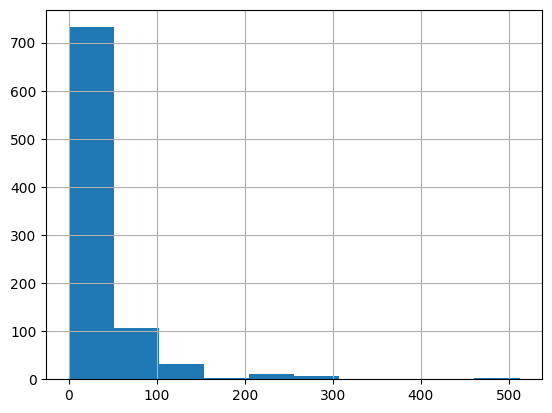

In [11]:
df['Fare'].hist()

In [12]:
df['LogFare'] = np.log(df['Fare'] + 1)

<Axes: >

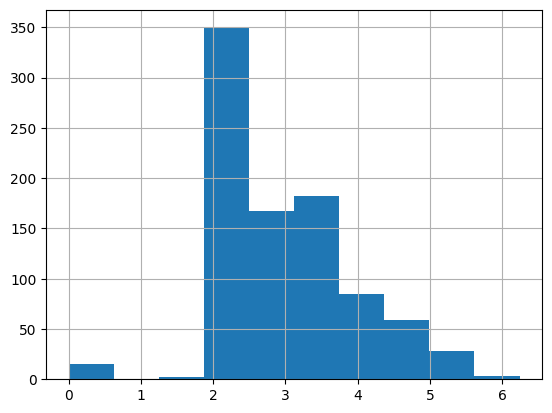

In [13]:
df['LogFare'].hist()

In [14]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [15]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [16]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [17]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


#Conver to Pytorch Tensors

In [18]:
from torch import tensor
t_dep = tensor(df.Survived)

In [19]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [20]:
t_indep.shape

torch.Size([891, 12])

In [31]:
torch.manual_seed(442)
#set the coefficients intially as random numbers
n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [32]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [23]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [24]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [25]:
preds = (t_indep*coeffs).sum(axis=1)

In [26]:
preds[:10]

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,  0.1613, -0.6285])

In [27]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5382)

In [28]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps) - deps).mean()

#Gradient Descent


In [33]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [35]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

In [37]:
loss.backward()

In [38]:
coeffs.grad

tensor([-0.0106,  0.0129, -0.0041, -0.0484,  0.2099, -0.2132, -0.1212, -0.0247,  0.1425, -0.1886, -0.0191,  0.2043])

Note below that the grads have doubled as you have run the loop a second time without setting the grads to 0 after the first run

In [39]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.0212,  0.0258, -0.0082, -0.0969,  0.4198, -0.4265, -0.2424, -0.0494,  0.2851, -0.3771, -0.0382,  0.4085])

In [40]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
  coeffs.sub_(coeffs.grad * 0.1)
  coeffs.grad.zero_()
  print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.4945)


In [41]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter()(df)

In [42]:
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
len(trn_indep), len(val_indep)

(713, 178)

#creating functions to automate the above

In [43]:
def update_coeffs(coeffs, lr):
  coeffs.sub_(coeffs.grad * lr)
  coeffs.grad.zero_()

In [44]:
def one_epoch(coeffs, lr):
  loss = calc_loss(coeffs, t_indep, t_dep)
  loss.backward()
  with torch.no_grad(): update_coeffs(coeffs, lr)
  print(f"{loss:.3f}", end="; ")

In [48]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [51]:
def train_model(epochs=30, lr=0.01):
  coeffs = init_coeffs()
  for i in range(epochs): one_epoch(coeffs, lr=lr)
  return coeffs

In [49]:
coeffs = train_model(18, lr=0.2)

0.538; 0.504; 0.479; 0.455; 0.432; 0.410; 0.389; 0.371; 0.367; 0.339; 0.343; 0.317; 0.329; 0.303; 0.311; 0.296; 0.297; 0.288; 

In [50]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2770),
 'SibSp': tensor(0.0886),
 'Parch': tensor(0.2346),
 'LogFare': tensor(0.0269),
 'Sex_male': tensor(-0.4069),
 'Sex_female': tensor(0.2460),
 'Pclass_1': tensor(0.7206),
 'Pclass_2': tensor(0.4254),
 'Pclass_3': tensor(0.3522),
 'Embarked_C': tensor(0.0906),
 'Embarked_Q': tensor(0.2471),
 'Embarked_S': tensor(0.2130)}

#Measuring Accuracy

In [52]:
preds = calc_preds(coeffs, val_indep)

In [54]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True, False,  True,  True,  True,  True, False, False,  True,  True, False])

In [55]:
results.float().mean()

tensor(0.7472)

In [56]:
def accuracy(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()

looking at the predictions carefully shows an obvious problem, some preds are >1 or <0, this can be fixed using a sigmoid function

In [57]:
preds[:28]

tensor([ 0.7604,  0.0952,  0.3529,  0.2704,  0.9914,  0.1020,  0.9204,  0.0984,  0.4095,  0.7988,  0.9537,  0.0845,  0.4591,  0.1092,
         0.3193,  1.2836,  0.0119,  0.8628,  0.7236,  0.4500,  0.2507,  0.9914,  0.9926,  0.4163,  0.0327, -0.0382,  0.0847,  0.1186])

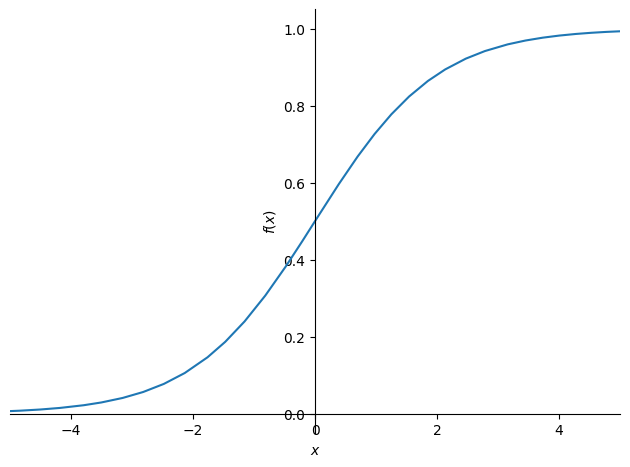

In [58]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5, 5)) #plotting a sigmoid

In [59]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [60]:
coeffs = train_model(lr=100)

0.475; 0.321; 0.288; 0.201; 0.197; 0.195; 0.194; 0.193; 0.193; 0.192; 0.192; 0.192; 0.192; 0.191; 0.191; 0.191; 0.191; 0.191; 0.191; 0.191; 0.191; 0.191; 0.191; 0.190; 0.190; 0.190; 0.190; 0.190; 0.190; 0.190; 

In [61]:
accuracy(coeffs)

tensor(0.8146)

In [62]:
show_coeffs()

{'Age': tensor(-0.7908),
 'SibSp': tensor(-0.9875),
 'Parch': tensor(-1.0607),
 'LogFare': tensor(0.5352),
 'Sex_male': tensor(-10.0831),
 'Sex_female': tensor(8.4854),
 'Pclass_1': tensor(3.3626),
 'Pclass_2': tensor(2.0122),
 'Pclass_3': tensor(-6.4659),
 'Embarked_C': tensor(1.7757),
 'Embarked_Q': tensor(1.9657),
 'Embarked_S': tensor(-5.0054)}

#submitting to Kaggle

In [66]:
tst_df = pd.read_csv('test.csv')
tst_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [68]:
tst_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [69]:
tst_df['Fare'] = tst_df.Fare.fillna(0)

In [71]:
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log(tst_df['Fare']+1)
tst_df = pd.get_dummies(tst_df, columns=["Sex", "Pclass", "Embarked"])

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [72]:
tst_df['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()

In [75]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [76]:
!head sub.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


#Using matrix product
so far have not used @ operator to get optimised matrix -vector products, below implements these

In [77]:
val_indep@coeffs

tensor([  3.6221, -21.5696, -12.3513, -22.3021,   6.4711, -21.5533,   3.0078, -21.5651, -11.9240,   5.4417,  13.6895, -21.6054, -11.6546,
        -21.5280, -12.0759,   6.7770, -21.8103,   5.2393,  -3.0753,  -5.0497, -21.9269,  13.3181,  13.3425, -11.7982, -21.7522, -14.8298,
        -21.6028, -14.6347, -13.3610, -14.6348, -21.5566,   5.2767,   6.4115,  13.7881, -11.6805,  -3.7143,  -3.1028,   3.9829, -14.9319,
        -21.5845, -13.1634,   5.2518, -21.5477,   3.3940, -22.0606, -11.7979,   5.3626, -21.6028, -11.9631, -22.0294, -21.6028, -21.5651,
        -22.1433, -21.6227, -11.6969,  -3.3467, -11.9091, -21.7520, -21.6128, -21.4640, -21.7016, -12.1015,  -2.9733, -21.5233, -14.8298,
        -21.6028,  -3.9728, -14.9289, -21.5428,  13.3434,   3.9343, -22.0996, -11.8863,  -4.2633, -21.6879, -13.2829,   5.3033, -14.8726,
         -3.7830,   3.9011, -12.0466, -12.1213, -14.9423,   3.8276, -21.5715, -21.6028, -21.6670, -21.9170, -21.5909,  -3.3284,  -3.4881,
         -3.4893, -21.7478, -13.07

In [78]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [79]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [80]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [81]:
coeffs = train_model(lr=100)

0.514; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 

In [83]:
accuracy(coeffs)

tensor(0.6685)

#Building a Neural Net

In [88]:
def init_coeffs(n_hidden=20):
  layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
  layer2 = torch.rand(n_hidden, 1)-0.3
  const = torch.rand(1)[0]
  return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [85]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
  l1,l2,const = coeffs
  res = F.relu(indeps@l1)
  res = res@l2 + const
  return torch.sigmoid(res)

In [86]:
def update_coeffs(coeffs, lr):
  for layer in coeffs:
    layer.sub_(layer.grad * lr)
    layer.grad.zero_()

In [89]:
coeffs = train_model(lr=1.4)

0.518; 0.511; 0.506; 0.501; 0.495; 0.490; 0.484; 0.479; 0.473; 0.468; 0.462; 0.457; 0.451; 0.446; 0.441; 0.436; 0.432; 0.427; 0.423; 0.419; 0.416; 0.413; 0.410; 0.408; 0.406; 0.404; 0.402; 0.400; 0.399; 0.398; 

In [90]:
coeffs = train_model(lr=20)

0.551; 0.493; 0.410; 0.388; 0.386; 0.385; 0.385; 0.385; 0.385; 0.385; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 0.384; 

In [91]:
accuracy(coeffs)

tensor(0.6685)

In [102]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [97]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [98]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [103]:
coeffs = train_model(lr=4)

0.569; 0.489; 0.476; 0.464; 0.453; 0.444; 0.436; 0.430; 0.425; 0.420; 0.417; 0.414; 0.411; 0.409; 0.407; 0.405; 0.404; 0.403; 0.401; 0.400; 0.399; 0.399; 0.398; 0.397; 0.397; 0.396; 0.395; 0.395; 0.395; 0.394; 

In [104]:
accuracy(coeffs)

tensor(0.6685)